In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataset=pd.read_csv('Position_Salaries.csv')
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [6]:
y=y.reshape(len(y),1)

In [10]:
from pandas.core.groupby.generic import ScalarResult
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(x,y)

In [ ]:
sc_y.inverse_transform(reg.predict(sc_x.transform([[6.5]])).reshape(-1,1))

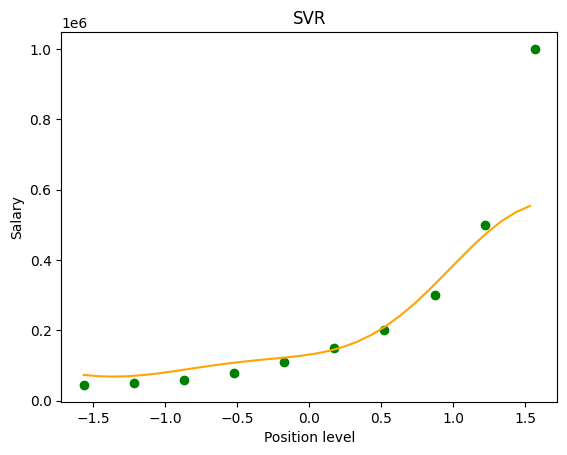

In [18]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'green')
plt.plot(x_grid, sc_y.inverse_transform(reg.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = 'orange')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()